In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.plotting.register_matplotlib_converters()

In [2]:
match_data = pd.read_csv('pl_data/matches.csv',index_col = 0)
team_seasons = pd.read_csv('pl_data/seasonstats.csv',index_col = 0)

In [3]:

helpt = { 'W':'wins','D':'draws','L':'loses','GF':'goals scored','GA':'goals conceeded','Pts':'points',
    'Sh':'shots','SoT':'shots on target','Cmp':'passes completed','PK':'penalty goals','Cmp':'pass completion%',
        'CK':'corners','CrdY':'yellow cards','CrdR':'red cards','Fls':'fouls conceeded','Pkcon':'penalities conceeded'
}

In [4]:
print(team_seasons.columns)


Index(['Season', 'Squad', 'W', 'D', 'L', 'GF', 'GA', 'Pts', 'Sh', 'SoT', 'FK',
       'PK', 'Cmp', 'Att', 'Cmp%', 'CK', 'CrdY', 'CrdR', 'Fls', 'PKcon', 'OG'],
      dtype='object')


In [5]:
team_seasons.head()

,Season,Squad,W,D,L,GF,GA,Pts,Sh,SoT,...,PK,Cmp,Att,Cmp%,CK,CrdY,CrdR,Fls,PKcon,OG
0,2023/2024,Manchester City,28,7,3,96,34,91,647.0,209.0,...,10.0,19094.0,22558.0,84.6,265.0,64.0,2.0,391.0,3.0,1.0
1,2023/2024,Arsenal,28,5,5,91,29,89,511.0,182.0,...,4.0,16133.0,19363.0,83.3,231.0,94.0,2.0,412.0,2.0,4.0
2,2023/2024,Liverpool,24,10,4,86,41,82,539.0,175.0,...,2.0,11899.0,15920.0,74.7,235.0,79.0,3.0,507.0,7.0,1.0
3,2023/2024,Aston Villa,20,8,10,76,61,68,470.0,159.0,...,3.0,12551.0,16818.0,74.6,184.0,89.0,2.0,385.0,2.0,0.0
4,2023/2024,Tottenham,20,6,12,74,61,66,555.0,198.0,...,5.0,21810.0,25029.0,87.1,206.0,90.0,3.0,414.0,6.0,2.0


In [6]:
match_data.head()

,Season,Date,Home,xG,Home Goals,Away Goals,xG.1,Away,Attendance,Venue
0,2023/2024,2023-08-11,Burnley,0.3,0.0,3.0,1.9,Manchester City,21572.0,Turf Moor
1,2023/2024,2023-08-12,Arsenal,0.8,2.0,1.0,1.2,Nott'ham Forest,59984.0,Emirates Stadium
2,2023/2024,2023-08-12,Everton,2.7,0.0,1.0,1.5,Fulham,39940.0,Goodison Park
3,2023/2024,2023-08-12,Sheffield Utd,0.5,0.0,1.0,1.9,Crystal Palace,31194.0,Bramall Lane
4,2023/2024,2023-08-12,Brighton,4.0,4.0,1.0,1.5,Luton Town,31872.0,The American Express Community Stadium


In [7]:
match_data = match_data.rename(columns = {'xG':'xG','xG.1':'xGC'})
print(match_data.columns)

Index(['Season', 'Date', 'Home', 'xG', 'Home Goals', 'Away Goals', 'xGC',
       'Away', 'Attendance', 'Venue'],
      dtype='object')


In [8]:
team_seasons = team_seasons.drop(columns = ['FK','OG'])

In [9]:
 team_seasons = team_seasons[team_seasons.Season >= '1992']


In [10]:
match_data = match_data[match_data.Date.notnull()]
match_data[match_data.Season >='2017'].isnull().sum()

Season          0
Date            0
Home            0
xG              0
Home Goals      0
Away Goals      0
xGC             0
Away            0
Attendance    441
Venue           0
dtype: int64

In [11]:
match_data = match_data[match_data.Season >= '1992']

In [12]:
def create_pos(df):
    df['pos'] = df.index + 1
    return df

In [13]:
team_seasons = team_seasons.groupby('Season').apply(create_pos)

In [14]:
team_seasons = team_seasons.set_index(['Season',"Squad"])

<AxesSubplot: ylabel='pos'>

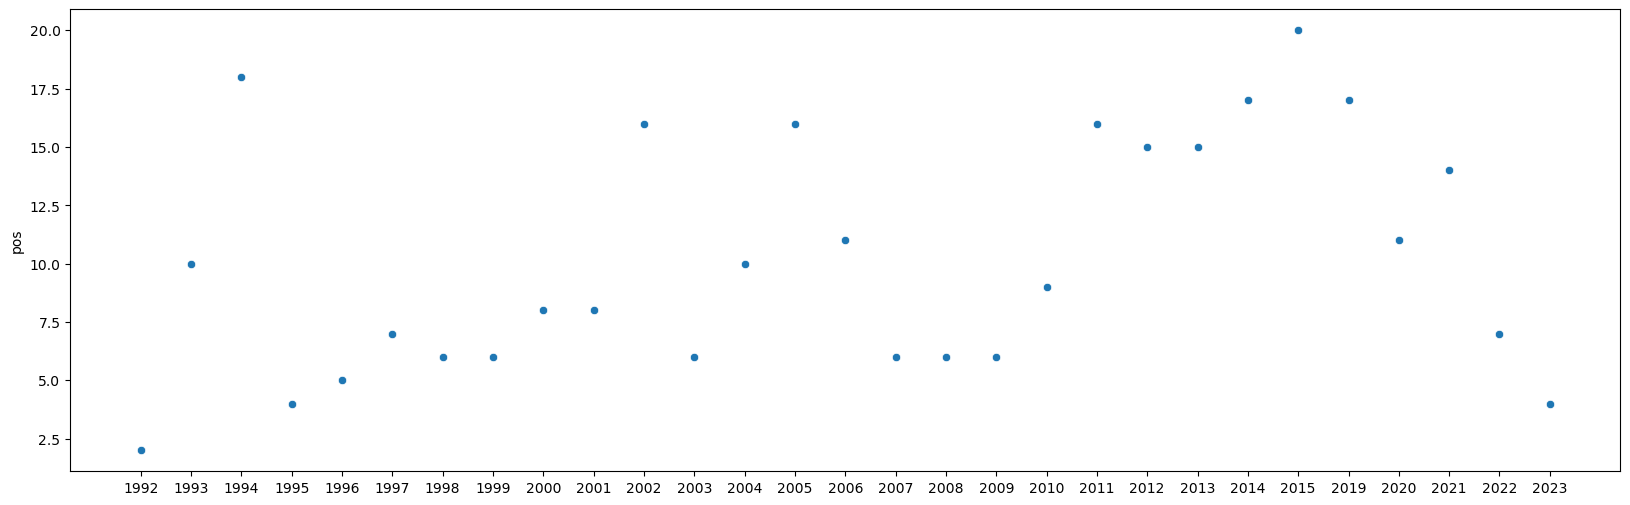

In [40]:

team = 'Aston Villa'
plt.figure(figsize=(20,6))
x = [ele.split('/')[0] for ele in team_seasons.loc[:,team,:].index]
y = team_seasons.loc[:,team,:].pos
sns.scatterplot(x=x,y=y)

<AxesSubplot: >

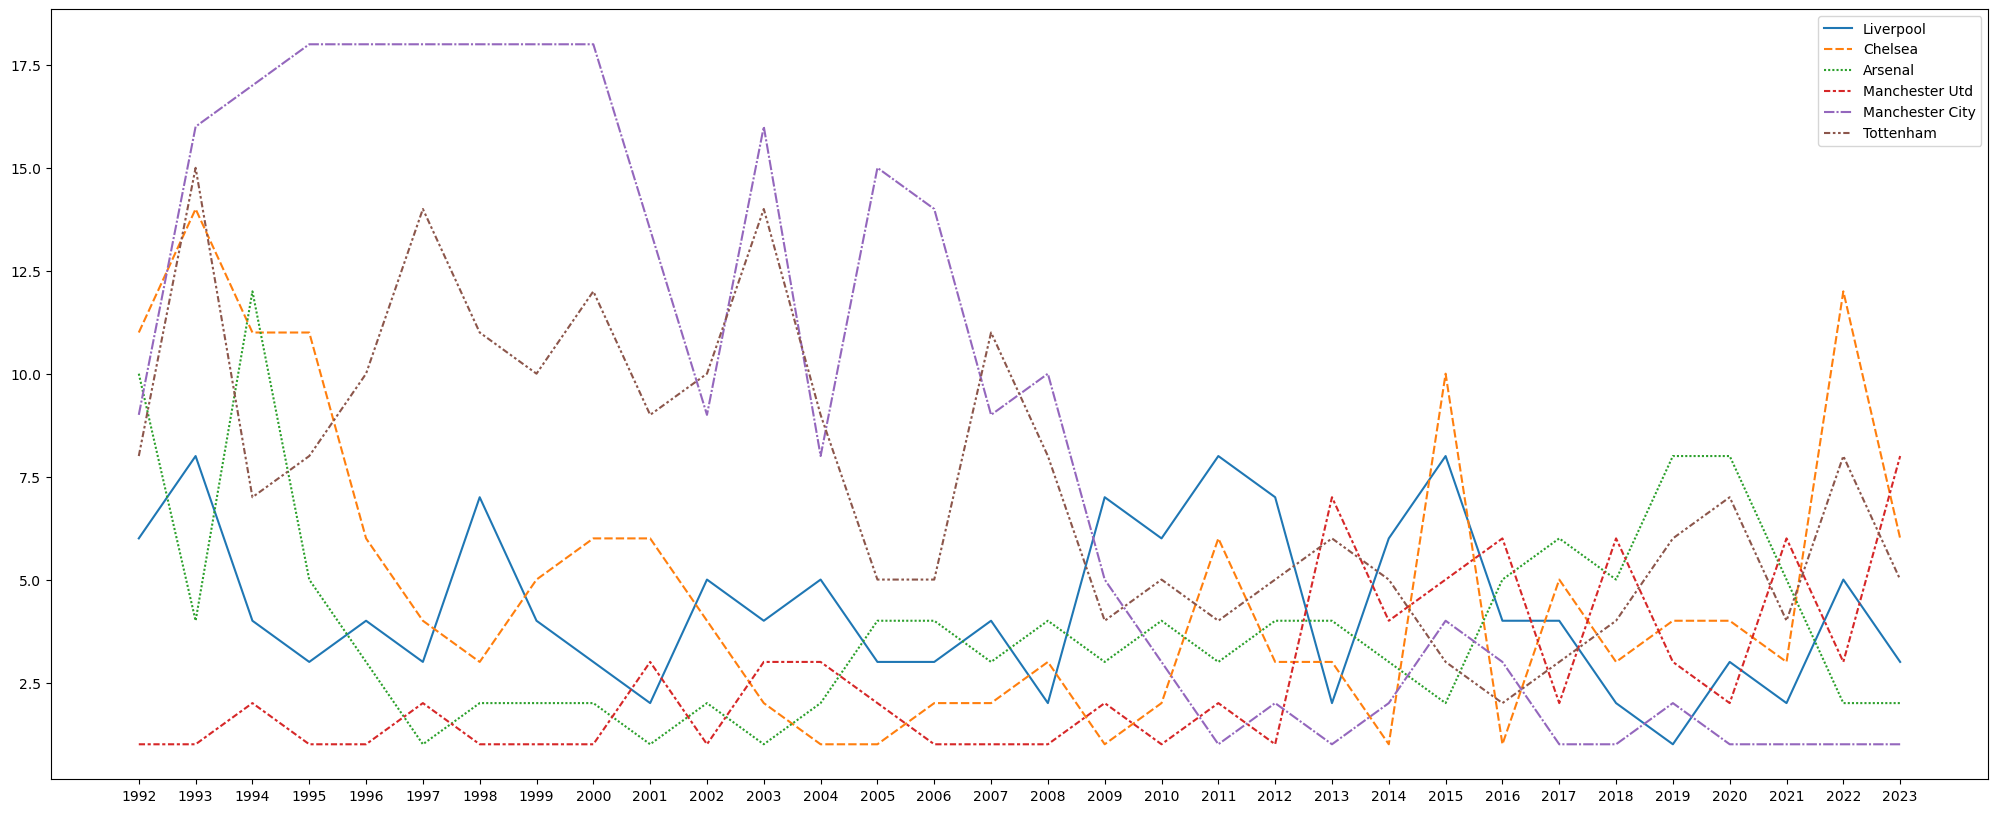

In [71]:
pos_data = pd.DataFrame(index = [str(x)+'/'+str(x+1) for x in range(1992,2024)])

def creating_pos_data(team):
    return team_seasons.loc[:,team,:].pos

for team in team_seasons.index.get_level_values('Squad').unique():
    pos_data[team] = creating_pos_data(team)

pos_data.index = pos_data.index.map(lambda x: x.split('/')[0])

pos_data.head()

plt.figure(figsize = (25,10))
sns.lineplot(data = pos_data[['Liverpool','Chelsea','Arsenal','Manchester Utd','Manchester City','Tottenham']])

<AxesSubplot: xlabel='Season', ylabel='Pts'>

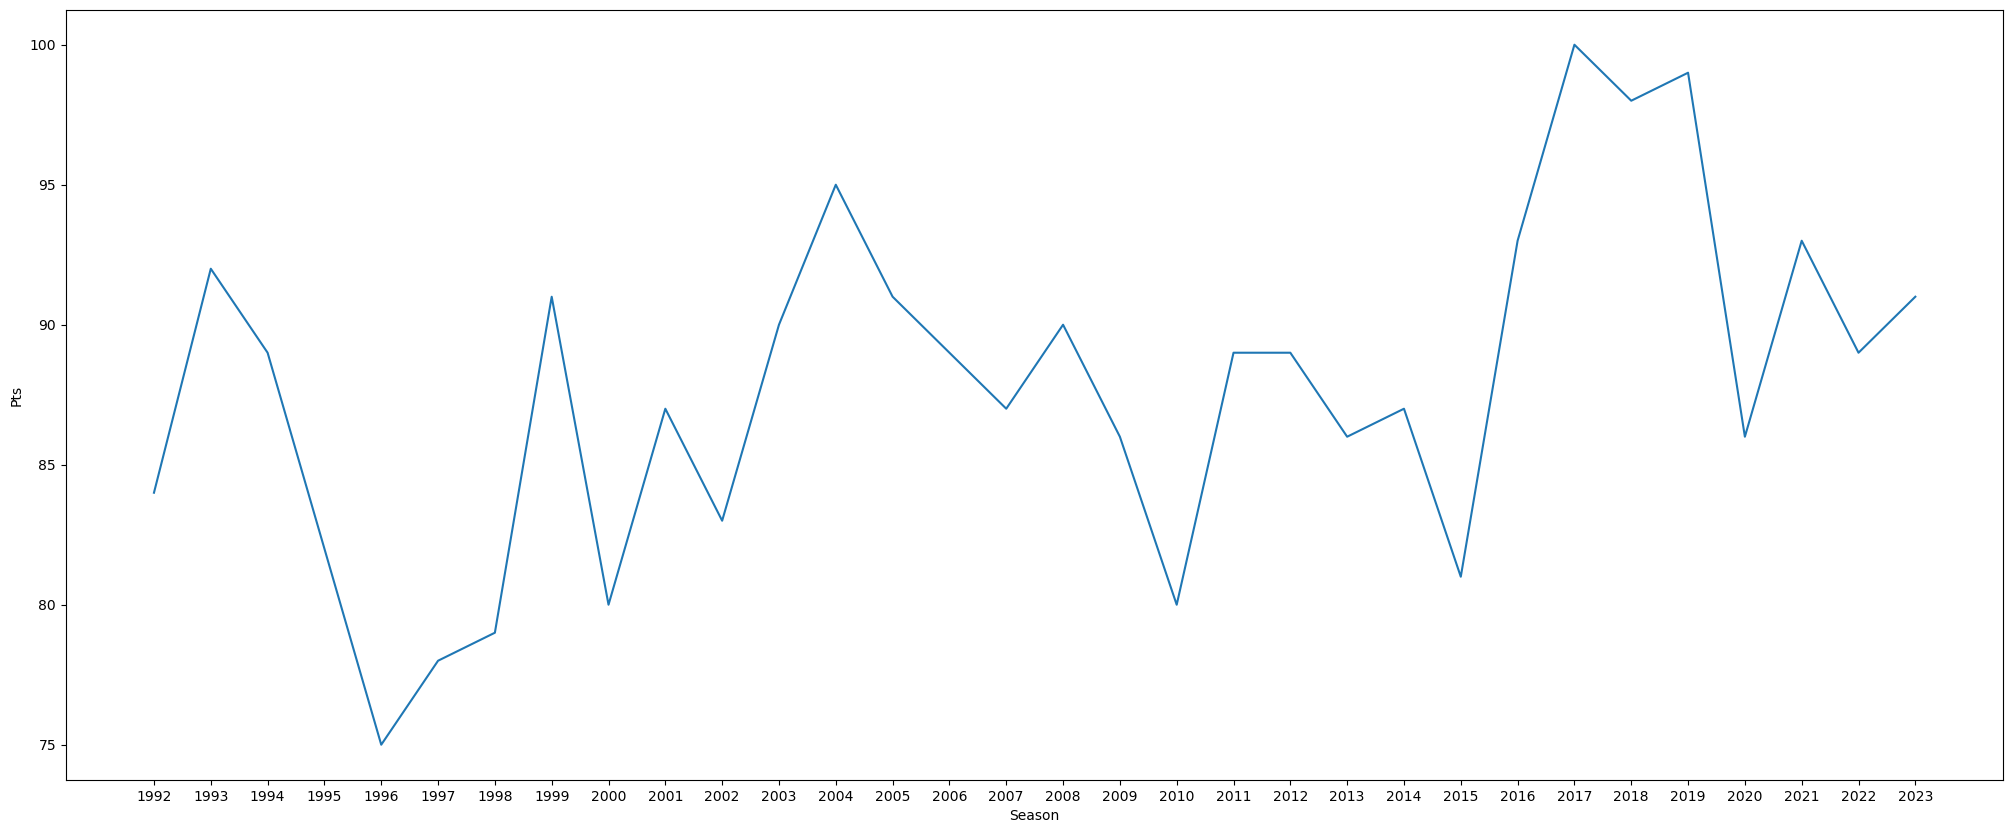

In [79]:
ser = team_seasons.groupby('Season').Pts.max()

ser.index = ser.index.map(lambda x: x.split('/')[0])

plt.figure(figsize = (25,10))
sns.lineplot(data = ser)

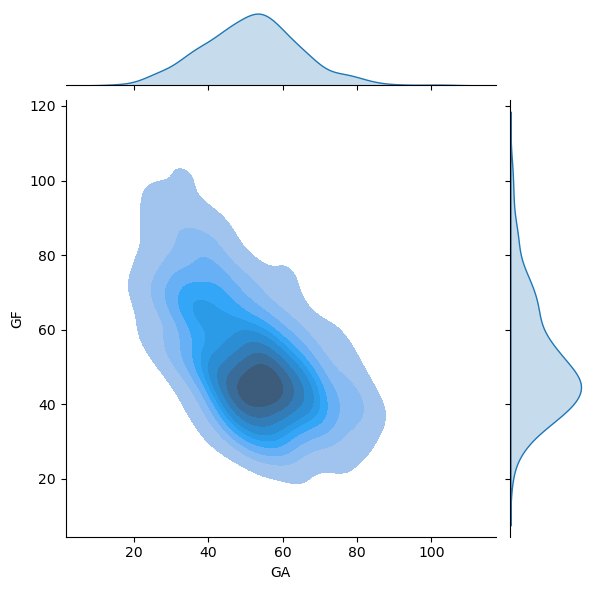

In [91]:
sns.jointplot(x='GA',y='GF',data = team_seasons,kind = 'kde',fill=True)

<AxesSubplot: xlabel='GA', ylabel='GF'>

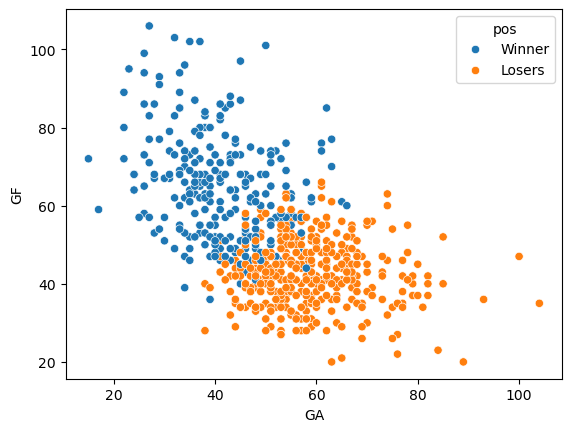

In [104]:
sns.scatterplot(x='GA',y='GF',data = team_seasons,hue =(team_seasons.pos<=8).map(lambda x:'Winner' if x else 'Losers'))

<AxesSubplot: xlabel='Fls', ylabel='CrdY'>

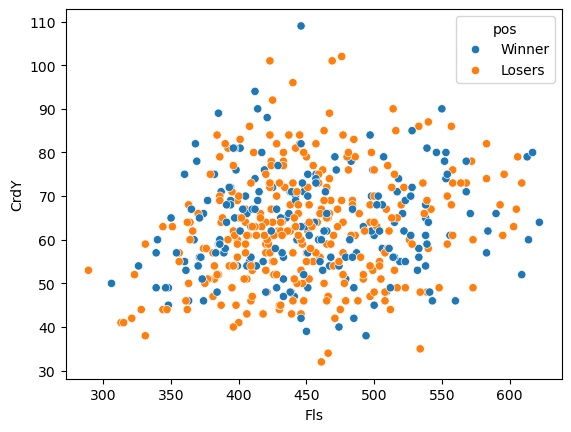

In [111]:
sns.scatterplot(x='Fls',y='CrdY',hue =(team_seasons.pos<=8).map(lambda x:'Winner' if x else 'Losers'),data = team_seasons)

<AxesSubplot: xlabel='Fls', ylabel='CrdY'>

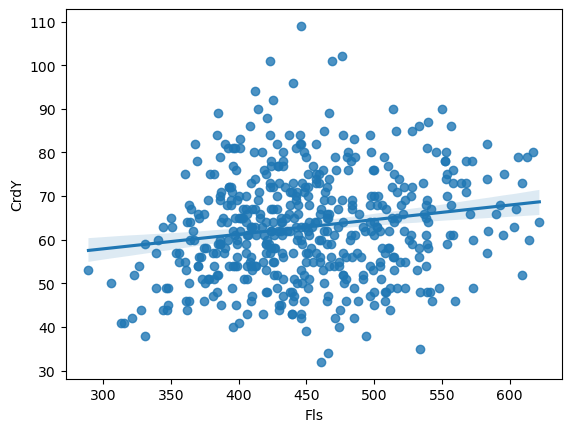

In [112]:
sns.regplot(x='Fls',y='CrdY',data = team_seasons)

<AxesSubplot: xlabel='Cmp%', ylabel='pos'>

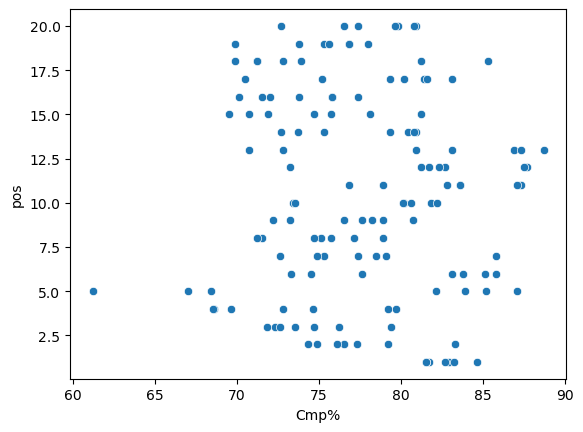

In [113]:
sns.scatterplot(x='Cmp%',y='pos',data = team_seasons)